In [1]:
import shutil
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random

# Định nghĩa kích thước ảnh
img_width, img_height = 96, 96

# Tạo mô hình
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3)),
        MaxPooling2D((2, 2)),
        
        Conv2D(128, (3, 3)),
        MaxPooling2D((2, 2)),
        
        Conv2D(256, (3, 3)),
        MaxPooling2D((2, 2)),
        
        GlobalAveragePooling2D(),
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        Dense(600, activation='softmax')  # Lớp đầu ra cho phân loại
    ])
    return model

# Tải trọng số mô hình
model = create_model()
model.load_weights('fingerprint_model_weights.weights.h5')

d:\Project\Th-c-t-p-t-t-nghi-p\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
def preprocess_images(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)  # Thêm chiều cho ảnh
    return img

In [26]:
def evaluate_threshold(test_data_path, model, features, sample_size=10000):
    positive_similarities = []
    negative_similarities = []
    positive_labels = []
    negative_labels = []

    # Xử lý các hình ảnh Positive
    positive_dir = os.path.join(test_data_path, "Positive")
    positive_files = [file for file in os.listdir(positive_dir) if file.endswith(".BMP")]

    # Lấy ngẫu nhiên 6000 mẫu hoặc tất cả nếu ít hơn
    sampled_positive_files = random.sample(positive_files, min(sample_size, len(positive_files)))

    for file in sampled_positive_files:
        img_path = os.path.join(positive_dir, file)
        input_image = preprocess_images(img_path)
        input_image = np.expand_dims(input_image, axis=0)

        # Trích xuất đặc trưng
        input_feature = model.predict(input_image).flatten()
        similarity = cosine_similarity([input_feature], features)

        # Lưu độ tương đồng tối đa và nhãn (giả định từ tên tệp)
        positive_similarities.append(np.max(similarity))
        positive_labels.append(str(int(file.split('_')[0]) - 1))  # Giả định nhãn là phần đầu của tên tệp

    # Xử lý các hình ảnh Negative
    negative_dir = os.path.join(test_data_path, "Negative")
    negative_files = [file for file in os.listdir(negative_dir) if file.endswith(".BMP")]

    # Lấy ngẫu nhiên 6000 mẫu hoặc tất cả nếu ít hơn
    sampled_negative_files = random.sample(negative_files, min(sample_size, len(negative_files)))

    for file in sampled_negative_files:
        img_path = os.path.join(negative_dir, file)
        input_image = preprocess_images(img_path)
        input_image = np.expand_dims(input_image, axis=0)

        # Trích xuất đặc trưng
        input_feature = model.predict(input_image).flatten()
        similarity = cosine_similarity([input_feature], features)

        # Lưu độ tương đồng tối đa và nhãn (giả định từ tên tệp)
        negative_similarities.append(np.max(similarity))
        negative_labels.append(str(int(file.split('_')[0]) - 1))  # Giả định nhãn là phần đầu của tên tệp

    return (positive_similarities, positive_labels), (negative_similarities, negative_labels)

In [27]:
test_data_path = "Data/SOCOFing/Test1"
features = np.load('fingerprint_features.npy')  # Tải đặc trưng đã lưu
(positive_similarities, positive_labels), (negative_similarities, negative_labels) = evaluate_threshold(test_data_path, model, features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

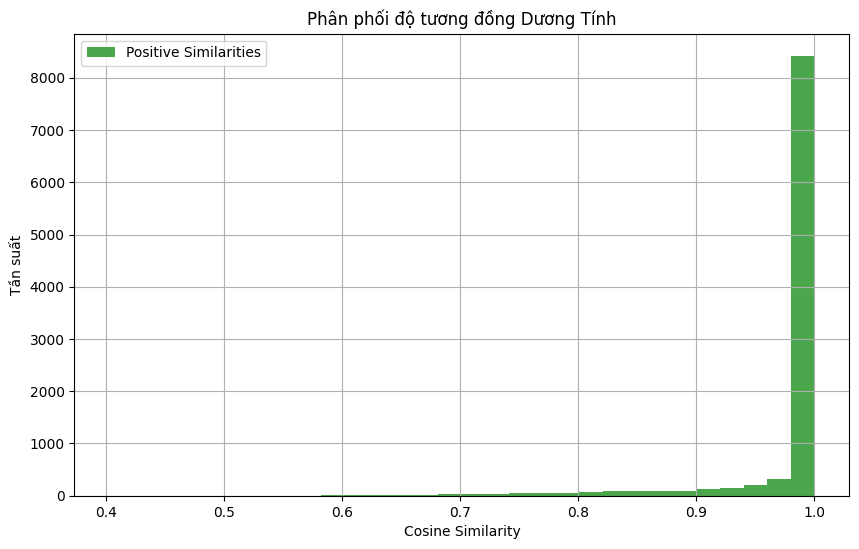

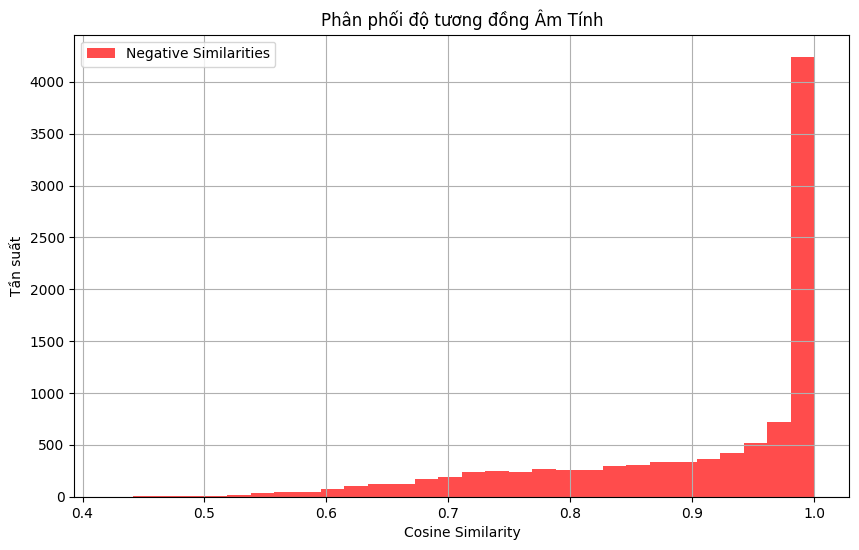

In [28]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân phối độ tương đồng dương tính
plt.figure(figsize=(10, 6))
plt.hist(positive_similarities, bins=30, alpha=0.7, label='Positive Similarities', color='g')
plt.title('Phân phối độ tương đồng Dương Tính')
plt.xlabel('Cosine Similarity')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ phân phối độ tương đồng âm tính
plt.figure(figsize=(10, 6))
plt.hist(negative_similarities, bins=30, alpha=0.7, label='Negative Similarities', color='r')
plt.title('Phân phối độ tương đồng Âm Tính')
plt.xlabel('Cosine Similarity')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def find_optimal_threshold(positive_similarities, negative_similarities):
    # Khởi tạo các tham số
    thresholds = np.linspace(0, 1, num=100)  # 100 ngưỡng từ 0 đến 1
    best_accuracy = 0
    optimal_threshold = 0

    # Đánh giá từng ngưỡng
    for threshold in thresholds:
        true_positive = np.sum(np.array(positive_similarities) >= threshold)
        true_negative = np.sum(np.array(negative_similarities) < threshold)
        
        total_positive = len(positive_similarities)
        total_negative = len(negative_similarities)

        # Tính toán độ chính xác
        accuracy = (true_positive + true_negative) / (total_positive + total_negative)

        # Cập nhật ngưỡng tốt nhất nếu độ chính xác hiện tại tốt hơn
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_threshold = threshold

    return optimal_threshold, best_accuracy

# Tìm ngưỡng tối ưu
optimal_threshold, best_accuracy = find_optimal_threshold(positive_similarities, negative_similarities)
print(f'Ngưỡng tối ưu: {optimal_threshold:.2f}, Độ chính xác tốt nhất: {best_accuracy:.2f}')

def evaluate_predictions(positive_similarities, negative_similarities, optimal_threshold):
    # Đánh giá dự đoán dựa trên ngưỡng tối ưu
    true_positive = np.sum(np.array(positive_similarities) >= optimal_threshold)
    false_negative = np.sum(np.array(positive_similarities) < optimal_threshold)
    true_negative = np.sum(np.array(negative_similarities) < optimal_threshold)
    false_positive = np.sum(np.array(negative_similarities) >= optimal_threshold)

    # Tính toán các chỉ số
    accuracy = (true_positive + true_negative) / (true_positive + false_negative + true_negative + false_positive)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

# Đánh giá dự đoán sử dụng ngưỡng tối ưu
accuracy, precision, recall, f1_score = evaluate_predictions(positive_similarities, negative_similarities, optimal_threshold)

# In ra các chỉ số đánh giá
print(f'Độ chính xác: {accuracy:.2f}')
print(f'Độ chính xác (Precision): {precision:.2f}')
print(f'Hồi tưởng (Recall): {recall:.2f}')
print(f'Điểm F1: {f1_score:.2f}')

def save_results_to_file(filename, accuracy, precision, recall, f1_score):
    with open(filename, 'w') as f:
        f.write(f'Ngưỡng tối ưu: {optimal_threshold:.2f}\n')
        f.write(f'Độ chính xác: {accuracy:.2f}\n')
        f.write(f'Độ chính xác (Precision): {precision:.2f}\n')
        f.write(f'Hồi tưởng (Recall): {recall:.2f}\n')
        f.write(f'Điểm F1: {f1_score:.2f}\n')
    print(f'Kết quả đã được lưu vào {filename}')

# Lưu kết quả vào file
save_results_to_file('evaluation_results.txt', accuracy, precision, recall, f1_score)


# def predict_image(img_path, model, features, optimal_threshold):
#     """Dự đoán hình ảnh mới dựa trên mô hình và ngưỡng tối ưu."""
#     input_image = preprocess_images(img_path)
#     input_image = np.expand_dims(input_image, axis=0)

#     # Trích xuất đặc trưng cho hình ảnh đầu vào
#     input_feature = model.predict(input_image).flatten()
#     similarity = cosine_similarity([input_feature], features)

#     max_similarity = np.max(similarity)

#     # Kiểm tra xem độ tương đồng có đạt ngưỡng không
#     if max_similarity >= optimal_threshold:
#         result = 'Dương tính'
#     else:
#         result = 'Âm tính'

#     return max_similarity, result

# # Ví dụ dự đoán cho một hình ảnh mới
# new_image_path = "path/to/your/test/image.BMP"  # Đường dẫn tới hình ảnh cần dự đoán
# similarity_score, prediction_result = predict_image(new_image_path, model, features, optimal_threshold)
# print(f'Do độ tương đồng: {similarity_score:.2f}, Kết quả dự đoán: {prediction_result}')

Ngưỡng tối ưu: 0.99, Độ chính xác tốt nhất: 0.72
Độ chính xác: 0.72
Độ chính xác (Precision): 0.69
Hồi tưởng (Recall): 0.82
Điểm F1: 0.75


UnicodeEncodeError: 'charmap' codec can't encode characters in position 2-3: character maps to <undefined>

In [25]:
def find_optimal_threshold(negative_similarities):
    # Khởi tạo các tham số
    thresholds = np.linspace(0, 1, num=100)  # 100 ngưỡng từ 0 đến 1
    best_accuracy = 0
    optimal_threshold = 0

    # Đánh giá từng ngưỡng
    for threshold in thresholds:
        # Tính toán false positives (nghĩa là hình ảnh âm tính bị phân loại là dương tính)
        false_positive = np.sum(np.array(negative_similarities) >= threshold)

        # Tính toán tổng số hình ảnh âm tính
        total_negative = len(negative_similarities)

        # Tính toán độ chính xác, ở đây là tỷ lệ của hình ảnh âm tính không bị phân loại sai
        accuracy = (total_negative - false_positive) / total_negative if total_negative > 0 else 0

        # Cập nhật ngưỡng tốt nhất nếu độ chính xác hiện tại tốt hơn
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_threshold = threshold

    return optimal_threshold, best_accuracy

# Tìm ngưỡng tối ưu chỉ dựa trên negative_similarities
optimal_threshold, best_accuracy = find_optimal_threshold(negative_similarities)
print(f'Ngưỡng tối ưu dựa trên âm tính: {optimal_threshold:.2f}, Độ chính xác tốt nhất: {best_accuracy:.2f}')

Ngưỡng tối ưu dựa trên âm tính: 1.00, Độ chính xác tốt nhất: 0.94
